In [1]:
# simple and efficient tool for data mining and data analysis,
# built on Numpy.scipy,and matplotlib,
# open source,commercially usable-BSD license.(BSD-Berkeley Source Distribution)

In [2]:
# achieve using scikit learn
# 1.classification-identifying which category an object belongs to,Application:Spam detection.
# 2.Regression-Predicting an attribute associated with an object,Application:Stock prices prediction.
# 3.Clustering-Automatic grouping of similar objects into sets,Application:Customer segmentation.
# 4.Model Selection-Comparing,validating and choosing parameters and models,
# Application:improving model accuracy via parameter tuning.
# 5.Dimensionality reduction-Reducing the number of random variables to consider,Application:To increase model efficiency.
# 6.PreProcessing-Feature extraction and normalization,
# Application:Transforming input data such as text for use with machine learning algorithms.

In [3]:
#importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier 
#from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
data={'pH':[6.6,9.6,6.6,7.6,5.5],'Temprature':[45,70,50,20,15],'Taste':[0,1,0,1,1],
      'color':[230,240,245,255,246],'Fat':[0,1,1,0,1],'Grade':[2,1.5,3,4,4]}
milk=pd.DataFrame(data)
milk

,pH,Temprature,Taste,color,Fat,Grade
0,6.6,45,0,230,0,2.0
1,9.6,70,1,240,1,1.5
2,6.6,50,0,245,1,3.0
3,7.6,20,1,255,0,4.0
4,5.5,15,1,246,1,4.0


In [5]:
milk.to_csv('milkquality.csv')

In [6]:
#Loading dataset
milk=pd.read_csv('milkquality.csv')

In [7]:
milk.head()

,Unnamed: 0,pH,Temprature,Taste,color,Fat,Grade
0,0,6.6,45,0,230,0,2.0
1,1,9.6,70,1,240,1,1.5
2,2,6.6,50,0,245,1,3.0
3,3,7.6,20,1,255,0,4.0
4,4,5.5,15,1,246,1,4.0


In [8]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5 non-null      int64  
 1   pH          5 non-null      float64
 2   Temprature  5 non-null      int64  
 3   Taste       5 non-null      int64  
 4   color       5 non-null      int64  
 5   Fat         5 non-null      int64  
 6   Grade       5 non-null      float64
dtypes: float64(2), int64(5)
memory usage: 408.0 bytes


In [9]:
milk.isnull().sum()

Unnamed: 0    0
pH            0
Temprature    0
Taste         0
color         0
Fat           0
Grade         0
dtype: int64

In [10]:
#preprocessing data
bins=(1,2.5,4) # between values in grade
group_names=["bad","good"]
milk['Grade']=pd.cut(milk['Grade'],bins=bins,labels=group_names)
milk['Grade'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [11]:
label_Grade=LabelEncoder()

In [12]:
milk['Grade']=label_Grade.fit_transform(milk['Grade'])

In [13]:
milk.head()

,Unnamed: 0,pH,Temprature,Taste,color,Fat,Grade
0,0,6.6,45,0,230,0,0
1,1,9.6,70,1,240,1,0
2,2,6.6,50,0,245,1,1
3,3,7.6,20,1,255,0,1
4,4,5.5,15,1,246,1,1


In [14]:
milk['Grade'].value_counts()

1    3
0    2
Name: Grade, dtype: int64

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grade', ylabel='count'>

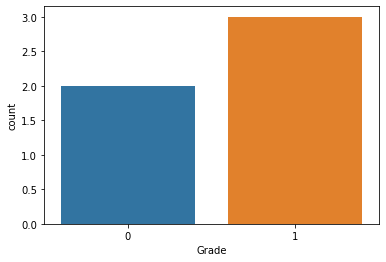

In [15]:
sns.countplot(milk['Grade'])

In [16]:
# now seperate the dataset as response variable and feature variables
X=milk.drop('Grade',axis=1)
y=milk['Grade']

In [17]:
# Train and Test spiltting of data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [18]:
# Applying standard scaling to get optimized result
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [19]:
X_train[:10]

array([[-0.4472136 ,  1.63299316,  1.33353857,  1.        , -0.2773501 ,
         1.        ],
       [-1.34164079, -0.81649658, -0.07018624, -1.        , -1.38675049,
        -1.        ],
       [ 0.4472136 , -0.81649658,  0.21055872, -1.        ,  0.2773501 ,
         1.        ],
       [ 1.34164079,  0.        , -1.47391105,  1.        ,  1.38675049,
        -1.        ]])

### Random Forest Classifier

In [20]:
rfc=RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [22]:
pred_rfc[:10]

array([0])

In [23]:
X_test[:20]

array([[0., 0., 0., 0., 0., 0.]])

In [25]:
#Let's see how model performed
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

[[0 0]
 [1 0]]


D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-sc

### SVM Classifier

In [26]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [27]:
#Let's see how model performed
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

[[1]]


### Neural network

In [28]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

In [29]:
#Let's see how model performed
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

[[1]]


In [30]:
from sklearn.metrics import accuracy_score
cm=accuracy_score(y_test,pred_rfc)
cm

0.0

In [32]:
milk.head()

,Unnamed: 0,pH,Temprature,Taste,color,Fat,Grade
0,0,6.6,45,0,230,0,0
1,1,9.6,70,1,240,1,0
2,2,6.6,50,0,245,1,1
3,3,7.6,20,1,255,0,1
4,4,5.5,15,1,246,1,1


In [33]:
Xnew=[[7.3,2.5,0.6,0.0,3.4,0.99]]
Xnew=sc.transform(Xnew)
ynew=rfc.predict(Xnew)
ynew

array([1])